## Data Dictionary
The database consists of three tables: <br>
_ci_transaction_, _study_area_  _drink_.

### _**ci_transaction**_
| Name | Description | Type |
| --- | --- | --- |
| <u>id</u> | unique transaction id | int |
| date | transaction date | string |
| days_after_open | number of days since opening the pop-up store on 2019-07-22 | int |
| day_of_week | 'Mon' - 'Sun' | string |
| hours_after_open | number of hours since opening at 7pm (0-5) | int |
| drink_id | id of the drink being purchased (0-16) | int |
| quantity | quantity of purchase | int |
| raining | whether it is raining at the time of purchase ('Yes', 'No', missing indicated by 'NA') | string |
| study_area_id | id of the customer's study area (0-6, missing indicated by -1) | int |

### _**study_area**_
| Name | Description | Type |
| --- | --- | --- |
| <u>id</u> | unique study area id (0-6) | int |
| name | building name | string |
| dist_to_cafe | distance to cafe insomnia (in meters) | int |

### _**drink**_
| Name | Description | Type |
| --- | --- | --- |
| <u>id</u> | unique drink id (0-16) | int |
| name | drink name | string |
| unit_price | unit price of the drink in AUD | float |

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
conn = sqlite3.connect('dataset/cafe_insomnia.sqlite')

In [3]:
query = '''
    SELECT c.days_after_open, SUM(c.quantity) * d.unit_price AS total_sales
    FROM ci_transaction c
    LEFT JOIN drink d
    ON c.drink_id = d.id
    GROUP BY c.days_after_open;
    '''
data = pd.read_sql(query,conn)
print(data)

     days_after_open  total_sales
0                  0        333.2
1                  1        378.0
2                  2        306.0
3                  3        392.0
4                  4        230.3
..               ...          ...
149              149       2044.0
150              150       2494.1
151              151       2092.3
152              152       1788.0
153              153       1800.0

[154 rows x 2 columns]


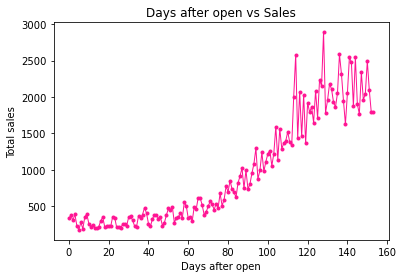

In [4]:
plt.plot(data['days_after_open'],data['total_sales'],color="deeppink",linewidth=1,linestyle='-', marker='.')
plt.xlabel('Days after open')
plt.ylabel('Total sales')
plt.title('Days after open vs Sales')
plt.savefig('graphs/Plot-Q1')

In [5]:
query = '''
    SELECT c.day_of_week, SUM(c.quantity) * d.unit_price AS total_sales
    FROM ci_transaction c
    LEFT JOIN drink d
    ON c.drink_id = d.id
    GROUP BY c.day_of_week;
    '''
data = pd.read_sql(query,conn)
print(data)

  day_of_week  total_sales
0         Fri      24196.2
1         Mon      22946.7
2         Sat      18968.0
3         Sun      25639.2
4         Thu      26072.9
5         Tue      22428.0
6         Wed      20502.0


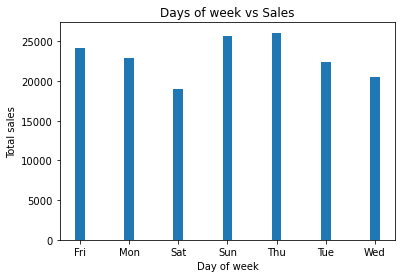

In [6]:
plt.bar(data.index,height=data['total_sales'],width=0.2)
plt.xlabel('Day of week')
plt.ylabel('Total sales')
plt.xticks(data.index, data['day_of_week'])
plt.title('Days of week vs Sales')
plt.savefig('graphs/Bar-Q2')

In [7]:
query = '''
    SELECT c.hours_after_open, SUM(c.quantity) * d.unit_price AS total_sales
    FROM ci_transaction c
    LEFT JOIN drink d
    ON c.drink_id = d.id
    GROUP BY c.hours_after_open;
    '''
data = pd.read_sql(query,conn)
print(data)

   hours_after_open  total_sales
0                 0      30076.2
1                 1      25768.0
2                 2      33507.0
3                 3      23232.0
4                 4      21852.0
5                 5      16681.5


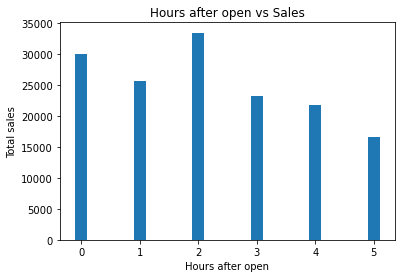

In [8]:
plt.bar(data.index,height=data['total_sales'],width=0.2)
plt.xlabel('Hours after open')
plt.ylabel('Total sales')
plt.xticks(data.index, data['hours_after_open'])
plt.title('Hours after open vs Sales')
plt.savefig('graphs/Bar2-Q2')

In [9]:
query = '''
    SELECT s.name, c.raining, SUM(c.quantity) * d.unit_price AS total_sales
    FROM ci_transaction c, study_area s
    LEFT JOIN drink d
    ON c.drink_id = d.id
    WHERE c.study_area_id = s.id
    GROUP BY s.name, c.raining;
    '''
data = pd.read_sql(query,conn)
print(data)

                        name raining  total_sales
0          Abercrombie (H70)      No      12769.4
1    Brennan MacCallum (A18)      No      12343.1
2              Carslaw (F07)      No      19095.0
3              Carslaw (F07)     Yes       3844.0
4       Fisher Library (F03)      No      24161.9
5       Fisher Library (F03)     Yes      22780.1
6          Law Library (F10)      No      24411.8
7          Law Library (F10)     Yes      20125.8
8  Peter Nicol Russell (PNR)      No       9872.4
9          The Quarter (A16)      No       9752.0


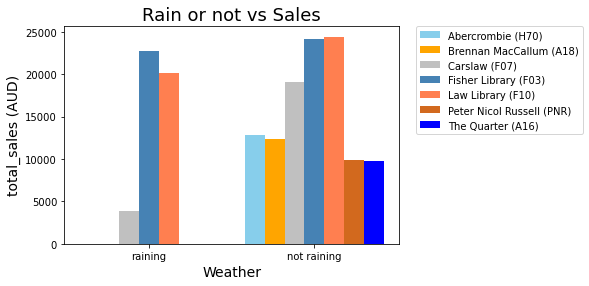

In [10]:
def multibars(bars_num,bars_datas,bars_width,bars_colors,bars_legends,bars_xticks):
    index = list(range(len(bars_datas[0])))
    for i in range(bars_num):
        index_new = np.add(index, (-0.5*(bars_num-1)+i)*bars_width)
        data = bars_datas[i]
        color = bars_colors[i]
        legend = bars_legends[i]
        plt.bar(index_new,height=data,width=bars_width,color=color,label=legend)

    ncol = int(bars_num/3) + 1
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0,ncol=ncol)
    plt.xticks([0,1],bars_xticks)

data_sales = []
for item in data['name'].unique():
    not_raining = data[(data['name'] == item) & (data['raining'] == 'No')]['total_sales'].values

    if not_raining.size > 0:
        not_raining = not_raining[0]
    else:
        not_raining = 0

    raining = data[(data['name'] == item) & (data['raining'] == 'Yes')]['total_sales'].values
    if raining.size > 0:
        raining = raining[0]
    else:
        raining = 0

    data_sales.append([raining,not_raining])

multibars(
    len(data['name'].unique()),
    data_sales,
    0.12,
    ['skyblue','orange','silver','steelblue','coral','chocolate','blue'],
    data['name'].unique(),
    ['raining','not raining']
    )
    
plt.xlabel('Weather',size=14)
plt.ylabel('total_sales (AUD)',size=14)
plt.title('Rain or not vs Sales',size=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0,ncol=1)
plt.savefig('graphs/Rain or not-Q3',bbox_inches='tight')